# <center><font>Итоговый проект. Бриф “Агентство недвижимости”</font>


In [2]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import seaborn as sns #для визуализаци 
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats                 # для решения математических задач
from sklearn import linear_model        # модуль линейных алгоритмов библиотеки машинного обучения
from sklearn import preprocessing       # модуль подготовки данных для подачи их в модель
from sklearn import model_selection     # модуль иструментов разбиения данных, использования перекрестной проверки и улучшения качества моделей
from sklearn import tree                # модуль алгоритма ML дерева решений
from sklearn import ensemble            # модуль ансамблевых алгоритмов ML
from sklearn import metrics             # метрические функции оценки ошибки прогноза
from sklearn import cluster             # модуль алгоритмов кластеризации
from sklearn import feature_selection   # модуль алгоритмов отбора факторов перед подачей в модель
from sklearn.model_selection import train_test_split #сплитование выборки

## 1. Задача проекта
Разработать сервис для предсказания стоимости домов на основе истории предложений.

***Бизнес-задача:*** определить характеристики и с их помощью спрогнозировать стоимость недвижимости (задача регрессии).

## 2. Знакомство с данными, базовый анализ 

Вы можете загрузить датасет на свой локальный компьютер:
- датасет: https://drive.google.com/file/d/11-ZNNIdcQ7TbT8Y0nsQ3Q0eiYQP__NIW/view

In [3]:
df = pd.read_csv('data.csv')
df.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


Итак, данные содержат 18 характеристик почти 300 тысяч домов. 
**Признаки:**
* status - статус продажи
* private pool и PrivatePool - наличие частного бассейна
* propertyType - тип недвижимости, поместья
* street - адрес дома
* baths - количество ванных комнат
* homeFacts - сведения о строении дома, содержит несколько отдельных данных, имеющих влияние на оценку недвижимости, дома, квартиры
* fireplace - сведения о наличии камина (ов) в доме
* city - город
* schools - сведения о школах в районе
* sqft - площадь дома в футах
* zipcode - почтовый индекс
* beds - количество спален в доме
* state - государство/штаты
* stories - этажность недвижимости
* mls-id и MlsId - идентификатор MLS (Multiple Listing Service - Служба множественного листинга)

**Целевой признак:**
* target - целевой признак, который необходимо спрогнозировать - цена недвижимости.

In [4]:
data = df.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Посмотрим общие статистические характеристики признаков. 

In [8]:
print(data.describe(include=['object']))
np.round(data.describe().T, 2)

          status private pool        propertyType                 street  \
count     337267         4181              342452                 377183   
unique       159            1                1280                 337076   
top     for sale          Yes  single-family home  Address Not Disclosed   
freq      156104         4181               92206                    672   

          baths                                          homeFacts fireplace  \
count    270847                                             377185    103114   
unique      229                                             321009      1652   
top     2 Baths  {'atAGlanceFacts': [{'factValue': '', 'factLab...       yes   
freq      52466                                               7174     50356   

           city                                            schools    sqft  \
count    377151                                             377185  336608   
unique     2026                                             29

,count,unique,top,freq
status,337267,159,for sale,156104
private pool,4181,1,Yes,4181
propertyType,342452,1280,single-family home,92206
street,377183,337076,Address Not Disclosed,672
baths,270847,229,2 Baths,52466
homeFacts,377185,321009,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",7174
fireplace,103114,1652,yes,50356
city,377151,2026,Houston,24442
schools,377185,297365,"[{'rating': [], 'data': {'Distance': [], 'Grad...",4204
sqft,336608,25405,0,11854


### 2.1 Преобразование имеющихся признаков

#### 2.1.1 Преобразование признака status

Признак status - статус продажи имеет 159 уникальных значений, это слишком много, создадим функцию status_func, которая выделит наиболее часто встречающиеся категории, остальные пометим как other

In [9]:
def status_func(status):
    
    # Создаём списки топ слов 
    # остальные пометим как other 
    for_sale = ['for']
    active = ['active', 'a', 'active/contingent']
    fore_closure = ['foreclosure', 'auction', 'foreclosed', 'pre-foreclosure']
    pending = ['p', 'pending']
    contract = ['under', 'c']
    new = ['new', 'n']
    back_change = ['back','change']
    rent = ['rent']
    coming_soon = ['coming']
    # Приведем все символы к нижнему регистру
    # Разобьём на списки слов 
    splitted_st = status.lower().split(' ')

    for i in splitted_st:

        if i in active:
            return 'active'
        elif i in for_sale:
            return 'for sale'
        elif i in fore_closure:
            return 'foreclosure'
        elif i in pending:
            return 'pending'
        elif i in new:
            return 'new'
        elif i in back_change:
            return 'back changes'
        elif i in rent:
            return 'rent'
        elif i in contract: 
            return 'contract'
        elif i in coming_soon: 
            return 'coming soon'
    
    return 'other'

#преобразовываем в строки и применяем функцию 
data['status'] = data['status'].astype(str).apply(status_func)

In [10]:
data['status'].value_counts()

status
for sale        199983
active          106527
other            41429
foreclosure      12409
pending           6887
new               6165
contract          3000
back changes       675
coming soon        110
Name: count, dtype: int64

#### 2.1.2 Преобразование признака propertyType

Признак propertyType - тип недвижимости, поместья имеет 1280 уникальных значений, это слишком много, создадим функцию type_func, которая выделит наиболее часто встречающиеся категории, остальные пометим как other

In [11]:
print(data['propertyType'].value_counts()[:15])

propertyType
single-family home               92206
Single Family                    62869
Single Family Home               31728
condo                            25968
lot/land                         20552
Condo                            16561
townhouse                        11464
Land                             10934
multi-family                      7900
Condo/Townhome/Row Home/Co-Op     7701
Townhouse                         6936
Traditional                       5913
coop                              3266
Multi Family                      2794
High Rise                         1823
Name: count, dtype: int64


In [13]:
def type_func(propertyType):
    
    # Создаём списки топ слов 
    # остальные пометим как other 
    single_family = ['single-family home', 'Single Family', 'Single Family Home', 'single-family', 'single', 'home', 'Family'] # односемейный(маленький, отдельный)
    condo = ['condo'] # квартира(кондоминимум)
    land = ['lot/land', 'land'] # земля
    townhouse = ['townhouse'] #таунхаус
    multi_family = ['multi-', 'Multi'] # под аренду
    co_op = ['coop', 'co'] # кооперативная квартира
    # Приведем все символы к нижнему регистру
    # Разобьём на списки слов 
    type_st = propertyType.lower().split(' ')

    for i in type_st:

        if i in single_family:
            return 'single_family'
        elif i in condo:
            return 'condo'
        elif i in land:
            return 'land'
        elif i in townhouse:
            return 'townhouse'
        elif i in multi_family:
            return 'multi_family'
        elif i in co_op:
            return 'co_op'
    
    return 'other'

#преобразовываем в строки и применяем функцию 
data['propertyType'] = data['propertyType'].astype(str).apply(type_func)

In [14]:
print(data['propertyType'].value_counts())

propertyType
single_family    192763
other             88695
condo             42531
land              31489
townhouse         18441
co_op              3266
Name: count, dtype: int64


#### 2.1.3 Преобразование признака homeFacts

Признак homeFacts - сведения о строении дома, содержит несколько отдельных данных, имеющих влияние на оценку недвижимости, дома, квартиры с помощью фунции extract_home_facts разобьем признак на несколько столбцов.

In [17]:
import ast
# Функция для парсинга строки в словарь Python
def extract_home_facts(row):
    try:
        # Приводим строку к корректному JSON-формату
        row = row.replace("'", "\"").replace("None", "null")
        parsed = ast.literal_eval(row)  # Преобразуем в словарь
        facts = parsed.get('atAGlanceFacts', [])  # Достаём список характеристик
        return {fact['factLabel']: fact['factValue'] for fact in facts}  # Создаём словарь
    except Exception as e:
        return {}  # Если ошибка, возвращаем пустой словарь
    
# Разворачиваем 'homeFacts' в новые столбцы
facts_df = data['homeFacts'].dropna().apply(extract_home_facts).apply(pd.Series)
facts_df


,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,,,,,5828 sqft,$159/sqft
2,1961,1967,Forced Air,Central,Attached Garage,"8,626 sqft",$965/sqft
3,2006,2006,Forced Air,Central,Detached Garage,"8,220 sqft",$371/sqft
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
377180,1990,1990,Other,Central,2 spaces,"8,500 sqft",$311
377181,1924,,Radiant,,null,,$337/sqft
377182,1950,1950,Other,,2,"1,600 sqft",$458/sqft
377183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Приведём к нижнему регистру 
facts_df['Heating'] = facts_df['Heating'].str.lower()
# избавимся от лишних кавычек
facts_df['Heating'] = facts_df['Heating'].replace("'", '', regex=True)
# Заменим пустые строки на none 
facts_df['Heating'] = facts_df['Heating'].replace('^\s*$', 'none', regex=True)
# Заменим значения no data на none 
facts_df['Heating'] = facts_df['Heating'].replace('no data', 'none')
# заменим строки в признаке на NaN значения 
facts_df['Heating'] = facts_df['Heating'].replace('none', np.nan)
# Заполним значения NaN нулями
facts_df['Heating'].fillna(0, inplace=True)
# Преобразуем в числовой вид 
facts_df['Heating'] = facts_df['Heating'].apply(lambda x: x if x==0 else 1)

C:\Users\olga\AppData\Local\Temp\ipykernel_2740\3838008699.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  facts_df['Heating'].fillna(0, inplace=True)


In [19]:
# Приведём к нижнему регистру 
facts_df['Cooling'] = facts_df['Cooling'].str.lower()
# избавимся от лишних кавычек
facts_df['Cooling'] = facts_df['Cooling'].replace("'", '', regex=True)
# Заменим пустые строки на none 
facts_df['Cooling'] = facts_df['Cooling'].replace('^\s*$', 'none', regex=True)
# Заменим значения no data на none 
facts_df['Cooling'] = facts_df['Cooling'].replace('no data', 'none')
# заменим строки в признаке на NaN значения 
facts_df['Cooling'] = facts_df['Cooling'].replace('none', np.nan)
# Заполним значения NaN нулями
facts_df['Cooling'].fillna(0, inplace=True)
# Преобразуем в числовой вид 
facts_df['Cooling'] = facts_df['Cooling'].apply(lambda x: x if x==0 else 1)

C:\Users\olga\AppData\Local\Temp\ipykernel_2740\572653523.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  facts_df['Cooling'].fillna(0, inplace=True)


In [20]:
# Приведём к нижнему регистру 
facts_df['Parking'] = facts_df['Parking'].str.lower()
# избавимся от лишних кавычек
facts_df['Parking'] = facts_df['Parking'].replace("'", '', regex=True)
# Заменим пустые строки на none 
facts_df['Parking'] = facts_df['Parking'].replace('^\s*$', 'none', regex=True)
# Заменим значения no data на none 
facts_df['Parking'] = facts_df['Parking'].replace('no data', 'none')
# заменим строки в признаке на NaN значения 
facts_df['Parking'] = facts_df['Parking'].replace('none', np.nan)
# Заполним значения NaN нулями
facts_df['Parking'].fillna(0, inplace=True)
# Преобразуем в числовой вид 
facts_df['Parking'] = facts_df['Parking'].apply(lambda x: x if x==0 else 1)

C:\Users\olga\AppData\Local\Temp\ipykernel_2740\1124621559.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  facts_df['Parking'].fillna(0, inplace=True)


In [21]:
facts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377185 entries, 0 to 377184
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year built      279528 non-null  object
 1   Remodeled year  279528 non-null  object
 2   Heating         377185 non-null  int64 
 3   Cooling         377185 non-null  int64 
 4   Parking         377185 non-null  int64 
 5   lotsize         279528 non-null  object
 6   Price/sqft      279528 non-null  object
dtypes: int64(3), object(4)
memory usage: 23.0+ MB


In [22]:
# Функция для преобразования
def convert_year(value):
    if isinstance(value, str):
        numbers = ''.join(c if c.isdigit() or c == '.' else ' ' for c in value)  # Оставляем числа и точку
        if numbers:
            try:
                return int(float(numbers))  # Берём число
            except ValueError:
                return np.nan  # Если число не удалось конвертировать, ставим NaN
    return np.nan  # Для None и некорректных значений

# Применяем функцию к колонке
facts_df['Year built'] = facts_df['Year built'].apply(convert_year)
facts_df['Remodeled year'] = facts_df['Remodeled year'].apply(convert_year)
facts_df['Year built']

0            NaN
1         2019.0
2         1961.0
3         2006.0
4            NaN
           ...  
377180    1990.0
377181    1924.0
377182    1950.0
377183       NaN
377184       NaN
Name: Year built, Length: 377185, dtype: float64

In [23]:
facts_df['lotsize'] = facts_df['lotsize'].apply(convert_year)
facts_df['Price/sqft'] = facts_df['Price/sqft'].apply(convert_year)

In [24]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Remodeled year': facts_df['Remodeled year'].mode()[0],
    'Year built': facts_df['Year built'].mode()[0],
    'lotsize': facts_df['lotsize'].median(),
    'Price/sqft': facts_df['Price/sqft'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
facts_df = facts_df.fillna(values)

In [25]:
facts_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year built,377185.0,1990.643066,33.892655,1.0,1969.0,2005.0,2019.0,2025.0
Remodeled year,377185.0,1996.869470,45.376464,0.0,2001.0,2006.0,2006.0,2021.0
Heating,377185.0,0.577303,0.493989,0.0,0.0,1.0,1.0,1.0
Cooling,377185.0,0.550870,0.497406,0.0,0.0,1.0,1.0,1.0
Parking,377185.0,0.413585,0.492476,0.0,0.0,0.0,1.0,1.0
lotsize,377185.0,9098.402094,615067.239203,0.0,3.0,3.0,3.0,284621040.0
Price/sqft,377185.0,200.902451,133.599477,0.0,152.0,168.0,187.0,999.0


#### 2.1.4 Преобразование признака fireplace

Признак fireplace - сведения о наличии камина (ов) в доме имеет 1652 значений, хотя для дальнейшей работы нам необходимо только информация о наличии или отсутствии камина в доме. Создадим функцию, в которой 0 - отсутствие камина, 1 - камин есть в доме. 

In [12]:
def fire_func(fire):
    # Создаём список
    words = ['Yes', 'yes']
    # Приведем все символы к нижнему регистру
    # Разобьём на списки слов 
    splitted_st = fire.lower().split(' ')

    for i in splitted_st:
        if i in words:
            return 1   
    return 0

#преобразовываем в строки и применяем функцию 
data['fireplace'] = data['fireplace'].astype(str).apply(fire_func)
print(data['fireplace'].value_counts())

fireplace
0    305973
1     71212
Name: count, dtype: int64


#### 2.1.5 Преобразование признака baths

Признак baths - количество ванных комнат имеет в значении лишние символы и формат строки, создадим функцию, которая убирает лишние символы и возвращает количество ванных комнат числом.

In [15]:
# выведем несколько значений признака, чтобы определить лишние знаки 
print(data['baths'].to_list()[:15])

['3.5', '3 Baths', '2 Baths', '8 Baths', nan, nan, nan, nan, '2', '3', '2 Baths', nan, '3 Baths', 'Bathrooms: 2', '3']


In [16]:
# Функция для преобразования
def convert_baths(value):
    if isinstance(value, str):
        numbers = ''.join(c if c.isdigit() or c == '.' else ' ' for c in value)  # Оставляем числа и точку
        numbers = numbers.split()  # Разбиваем строку на части, убирая лишние символы
        if numbers:
            try:
                return int(float(numbers[0]) // 1)  # Берём первое число, округляем вниз
            except ValueError:
                return np.nan  # Если число не удалось конвертировать, ставим NaN
    return np.nan  # Для None и некорректных значений

# Применяем функцию к колонке
data['baths_clean'] = data['baths'].apply(convert_baths)
data['baths_clean']

0         3.0
1         3.0
2         2.0
3         8.0
4         NaN
         ... 
377180    6.0
377181    3.0
377182    3.0
377183    NaN
377184    2.0
Name: baths_clean, Length: 377185, dtype: float64

#### 2.1.6 Преобразование признака PrivatePool

Признак PrivatePool - наличие частного бассейна. Создадим функцию, в которой 0 - отсутствие бассейна, 1 - бассейн есть в доме. 

In [47]:
def pool_func(pool):
    # Создаём список
    words = ['Yes', 'yes']
    # Приведем все символы к нижнему регистру
    # Разобьём на списки слов 
    splitted_st = pool.lower().split(' ')

    for i in splitted_st:
        if i in words:
            return 1   
    return 0

#преобразовываем в строки и применяем функцию 
data['PrivatePool'] = data['PrivatePool'].astype(str).apply(pool_func)
print(data['PrivatePool'].value_counts())

PrivatePool
0    336874
1     40311
Name: count, dtype: int64


#### 2.1.7 Преобразование признака state

Распределим штаты в зависимости от расположения, по сторонам света: south, west, east, north.

In [26]:
print(data['state'].value_counts())

state
FL    115449
TX     83786
NY     24479
CA     23386
NC     21862
TN     18340
WA     13826
OH     12588
IL      8939
NV      8482
GA      6705
CO      6404
PA      5561
MI      5161
DC      4674
AZ      3347
IN      3328
OR      2789
MA      1516
UT      1325
MD      1090
VT       868
MO       866
VA       801
WI       452
NJ       436
ME       259
IA       242
KY        90
OK        49
MS        40
SC        28
MT         7
DE         5
Fl         1
BA         1
AL         1
OT         1
OS         1
Name: count, dtype: int64


In [27]:
# заменим сокращения 
data['state'] = data['state']. replace(['TX', 'OK', 'MS', 'AL', 'TN', 'GA', 'FL', 'KY', 'SC', 'NC', 'VA', 'MD', 'DE'],
                            ["south", "south", "south", "south", "south", "south", "south", "south", "south", "south", "south", "south", "south"])
data['state'] = data['state']. replace(['WA', 'OR', 'CA', 'NV', 'AZ', 'MT', 'CO', 'DC', 'UT'],
                            ["west", "west", "west", "west", "west", "west", "west", "west", "west"])
data['state'] = data['state']. replace(['PA', 'NY', 'NJ', 'VT', 'MA', 'ME', 'MI', 'Fl', 'BA'],
                            ["east", "east", "east", "east", "east", "east", "east", "east", "east"])
data['state'] = data['state']. replace(['OH', 'IL', 'IN', 'MO', 'WI', 'IA', 'OT', 'OS'],
                            ["north", "north", "north", "north", "north", "north", "north", "north"])

In [28]:
print(data['state'].value_counts())

state
south    248246
west      64240
east      38282
north     26417
Name: count, dtype: int64


#### 2.1.8 Преобразование признака schools

Признак schools - сведения о школах в районе, содержит несколько отдельных данных, имеющих влияние на оценку недвижимости, дома, квартиры с помощью фунции extract_schools разобьем признак на несколько столбцов.

In [29]:
import ast
# Функция для парсинга сложных данных
def extract_schools(row):
    try:
        row = row.replace("'", "\"").replace('""', '"')  # Исправляем кавычки
        parsed = ast.literal_eval(row)  # Преобразуем строку в Python-объект
        data = parsed[0]  # Берём первый (и единственный) словарь

        schools = []
        for i, school in enumerate(data.get("name", [])):
            school_data = {
                f"school_{i+1}_name": school,
                f"school_{i+1}_rating": data.get("rating", [None])[i],
                f"school_{i+1}_distance": data.get("data", {}).get("Distance", [None])[i],
                f"school_{i+1}_grades": data.get("data", {}).get("Grades", [None])[i]
            }
            schools.append(school_data)

        return pd.Series({k: v for d in schools for k, v in d.items()})  # Разворачиваем в столбцы

    except Exception as e:
        return pd.Series({})  # Возвращаем пустые значения при ошибке

schools_df = data['schools'].dropna().apply(extract_schools)
schools_df

,school_1_name,school_1_rating,school_1_distance,school_1_grades,school_2_name,school_2_rating,school_2_distance,school_2_grades,school_3_name,school_3_rating,...,school_61_distance,school_61_grades,school_62_name,school_62_rating,school_62_distance,school_62_grades,school_63_name,school_63_rating,school_63_distance,school_63_grades
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,East Valley High School&Extension,4/10,1.65mi,9-12,Eastvalley Middle School,None/10,1.32mi,3-8,Trentwood Elementary School,4/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paul Revere Middle School,8/10,1.19mi,6-8,Brentwood Science School,4/10,2.06mi,K-5,Palisades Charter High School,8/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mcculloch Intermediate School,9/10,1.05mi,5-6,Bradfield Elementary School,9/10,0.1mi,PK-4,Highland Park Middle School,10/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Southwest Middle School,4/10,5.96mi,7-8,Bayside High School,5/10,3.25mi,9-12,Westside Elementary School,5/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,Air Base Elementary School,10/10,32.1 mi,PK-8,Dr Michael M. Krop Senior High School,5/10,1.1 mi,9-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377181,Hope College Prep High School,1/10,10.61mi,9-12,Lake View High School,5/10,1.42mi,9-12,Nettelhorst Elementary School,7/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377182,Ps 48 William Wordsworth,5/10,0.48mi,PK-5,Jhs 8 Richard S Grossley,4/10,0.73mi,6-8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377183,Hiliard El,NA,1.3 mi,PK-5,Forest Brook Middle,NA,0.5 mi,6-8,North Forest High School,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
schools_data = schools_df.copy()

In [31]:
# Функция для преобразования
def convert_school_rating(value):
    if isinstance(value, str):
        numbers = ''.join(c if c.isdigit() else ' ' for c in value)  # Оставляем число
        numbers = numbers.split()  # Разбиваем строку на части, убирая лишние символы
        if numbers:
            try:
                return int(float(numbers[0]))  # Берём первое число
            except ValueError:
                return np.nan  # Если число не удалось конвертировать, ставим NaN
    return np.nan  # Для None и некорректных значений

# Применяем функцию к колонке
schools_data['school_1_rating'] = schools_data['school_1_rating'].apply(convert_school_rating)
schools_data['school_2_rating'] = schools_data['school_2_rating'].apply(convert_school_rating)
schools_data['school_3_rating'] = schools_data['school_3_rating'].apply(convert_school_rating)
schools_data['school_3_rating']

0          NaN
1          4.0
2          8.0
3         10.0
4          5.0
          ... 
377180     NaN
377181     7.0
377182     NaN
377183     NaN
377184     3.0
Name: school_3_rating, Length: 377185, dtype: float64

In [32]:
schools_data['school_1_rating'] = schools_data['school_1_rating'].fillna(schools_data['school_1_rating'].median())
schools_data['school_2_rating'] = schools_data['school_2_rating'].fillna(schools_data['school_2_rating'].median())
schools_data['school_3_rating'] = schools_data['school_3_rating'].fillna(schools_data['school_3_rating'].median())

In [33]:
# Функция для преобразования
def convert_school_distance(value):
    if isinstance(value, str):
        numbers = ''.join(c if c.isdigit() or c == '.' else ' ' for c in value)  # Оставляем числа и точку
        numbers = numbers.split()  # Разбиваем строку на части, убирая лишние символы
        if numbers:
            try:
                return int(float(numbers[0]))  # Берём первое число
            except ValueError:
                return np.nan  # Если число не удалось конвертировать, ставим NaN
    return np.nan  # Для None и некорректных значений

# Применяем функцию к колонке
schools_data['school_1_distance'] = schools_data['school_1_distance'].apply(convert_school_distance)
schools_data['school_2_distance'] = schools_data['school_2_distance'].apply(convert_school_distance)
schools_data['school_3_distance'] = schools_data['school_3_distance'].apply(convert_school_distance)
schools_data['school_2_distance']

0         NaN
1         1.0
2         2.0
3         0.0
4         3.0
         ... 
377180    1.0
377181    1.0
377182    0.0
377183    0.0
377184    1.0
Name: school_2_distance, Length: 377185, dtype: float64

In [34]:
schools_data['school_1_distance'] = schools_data['school_1_distance'].fillna(schools_data['school_1_distance'].median())
schools_data['school_2_distance'] = schools_data['school_2_distance'].fillna(schools_data['school_2_distance'].median())
schools_data['school_3_distance'] = schools_data['school_3_distance'].fillna(schools_data['school_3_distance'].median())

In [36]:
schools_data = schools_data[['school_1_rating', 'school_1_distance', 'school_2_rating', 'school_2_distance',  'school_3_rating', 'school_3_distance']]

In [37]:
schools_data.head()

,school_1_rating,school_1_distance,school_2_rating,school_2_distance,school_3_rating,school_3_distance
0,5.0,1.0,5.0,1.0,5.0,1.0
1,4.0,1.0,10.0,1.0,4.0,1.0
2,8.0,1.0,4.0,2.0,8.0,2.0
3,9.0,1.0,9.0,0.0,10.0,1.0
4,4.0,5.0,5.0,3.0,5.0,3.0


#### 2.1.9 Преобразование признака beds

Признак beds - количество спален в доме имеет в значении лишние символы и формат строки, создадим функцию convert_beds, которая убирает лишние символы.

In [38]:
# Функция для преобразования
def convert_beds(value):
    if isinstance(value, str):
        numbers = ''.join(c if c.isdigit() or c == '.' else ' ' for c in value)  # Оставляем числа и точку
        numbers = numbers.split()  # Разбиваем строку на части, убирая лишние символы
        if numbers:
            try:
                return int(float(numbers[0]) // 1)  # Берём первое число, округляем вниз
            except ValueError:
                return np.nan  # Если число не удалось конвертировать, ставим NaN
    return np.nan  # Для None и некорректных значений

# Применяем функцию к колонке
data['beds_clean'] = data['beds'].apply(convert_beds)
data['beds_clean']

0         4.0
1         3.0
2         3.0
3         5.0
4         NaN
         ... 
377180    5.0
377181    3.0
377182    3.0
377183    8.0
377184    3.0
Name: beds_clean, Length: 377185, dtype: float64

#### 2.1.10 Преобразование признака sqft

Признак sqft - площадь дома в футах имеет в значении лишние символы и формат строки, создадим функцию convert_sqft, которая убирает лишние символы.

In [39]:
# Функция для извлечения чисел
def convert_sqft(value):
    value = str(value).replace(',', '')  # Убираем запятые
    value = ''.join([c for c in value if c.isdigit() or c == '.'])  # Оставляем только цифры и точку
    return int(float(value)) if value else None  # Преобразуем в float

# Применяем функцию к колонке
data['sqft_clean'] = data['sqft'].apply(convert_sqft)
data['sqft_clean']

0         2900.0
1         1947.0
2         3000.0
3         6457.0
4            NaN
           ...  
377180    4017.0
377181    2000.0
377182    1152.0
377183       NaN
377184    1462.0
Name: sqft_clean, Length: 377185, dtype: float64

#### 2.1.11 Преобразование признака stories

Признак stories - этажность недвижимости имеет 347 уникальных значений, это слишком много, создадим функцию stories_func, которая выделит наиболее часто встречающиеся категории, остальные пометим как other

In [40]:
def stories_func(stories):
    
    # Создаём списки топ слов 
    # остальные пометим как other 
    one_story = ['1', '1.0', 'One', '1 Level', 'One Level', 'One Story', '1.0000']
    two_story = ['2', '2.0', 'Two' , '2 Level', '2 Story', '2.0000', '2 Stories', '2.00']
    three_story = ['3', '3.0', '3+' , '3 Level', '3 Story', '3 Stories', 'Tri-Level']
    four_story=['4 Story', '4.00', '4']
    condo = ['Condo']
    townhouse = ['Townhome', 'Townhouse']
    apartment = ['Apartment']
    # Приведем все символы к нижнему регистру
    # Разобьём на списки слов 
    splitted_story = stories.lower().split(' ')

    for i in splitted_story:

        if i in one_story:
            return 'one_story'
        elif i in two_story:
            return 'two_story'
        elif i in three_story:
            return 'three_story'
        elif i in four_story:
            return 'four_story'
        elif i in condo:
            return 'condo'
        elif i in townhouse:
            return 'townhouse'
        elif i in apartment:
            return 'apartment'
    return 'other'

#преобразовываем в строки и применяем функцию 
data['stories'] = data['stories'].astype(str).apply(stories_func)

In [41]:
print(data['stories'].value_counts())

stories
other          187889
one_story       92399
two_story       79243
three_story     16673
four_story        981
Name: count, dtype: int64


#### 2.1.12 Преобразование признака target

Признак beds - целевой признак, который необходимо спрогнозировать - цена недвижимости имеет в значении лишние символы и формат строки, создадим функцию convert_price, которая убирает лишние символы.

In [42]:
import re
# Функция для преобразования строки в число
def convert_price(price):
    price = str(price).replace('$', '')  # Убираем запятые
    price = ''.join([c for c in price if c.isdigit() or c == '.'])  # Оставляем только цифры и точку
    return int(float(price)) if price else None

# Применяем функцию
data['target_clean'] = data['target'].apply(convert_price)
data['target_clean']

0          418000.0
1          310000.0
2         2895000.0
3         2395000.0
4            5000.0
            ...    
377180    1249000.0
377181     674999.0
377182     528000.0
377183      34500.0
377184     204900.0
Name: target_clean, Length: 377185, dtype: float64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        377185 non-null  object 
 1   private pool  4181 non-null    object 
 2   propertyType  377185 non-null  object 
 3   street        377183 non-null  object 
 4   baths         270847 non-null  object 
 5   homeFacts     377185 non-null  object 
 6   fireplace     377185 non-null  int64  
 7   city          377151 non-null  object 
 8   schools       377185 non-null  object 
 9   sqft          336608 non-null  object 
 10  zipcode       377185 non-null  object 
 11  beds          285903 non-null  object 
 12  state         377185 non-null  object 
 13  stories       377185 non-null  object 
 14  mls-id        24942 non-null   object 
 15  PrivatePool   40311 non-null   object 
 16  MlsId         310305 non-null  object 
 17  target        374704 non-null  object 
 18  bath

### 2.2 Заполнение пропусков в признаках

Пропуски в столбцах  -  baths_clean, beds_clean, sqft_clean, target_clean заполним медианным значением.

In [44]:
data['baths_clean'] = data['baths_clean'].fillna(data['baths_clean'].median())
data['beds_clean'] = data['beds_clean'].fillna(data['beds_clean'].median())
data['sqft_clean'] = data['sqft_clean'].fillna(data['sqft_clean'].median())
data['target_clean'] = data['target_clean'].fillna(data['target_clean'].median())

In [45]:
data.drop(['baths', 'beds', 'sqft', 'target', 'private pool', 'mls-id', 'street', 'city', 'MlsId', 'zipcode'], axis = 1, inplace = True)

In [49]:
data.drop(['schools', 'homeFacts'], axis = 1, inplace = True)

Объединим основной датасей data c датасетами facts_df и schools_data.

In [50]:
df = pd.concat([data, facts_df], axis=1)

In [51]:
data = pd.concat([df, schools_data], axis=1)
data.head()

,status,propertyType,fireplace,state,stories,PrivatePool,baths_clean,beds_clean,sqft_clean,target_clean,...,Cooling,Parking,lotsize,Price/sqft,school_1_rating,school_1_distance,school_2_rating,school_2_distance,school_3_rating,school_3_distance
0,active,single_family,0,south,other,0,3.0,4.0,2900.0,418000.0,...,0,0,3.0,168.0,5.0,1.0,5.0,1.0,5.0,1.0
1,for sale,single_family,0,west,two_story,0,3.0,3.0,1947.0,310000.0,...,0,0,5828.0,159.0,4.0,1.0,10.0,1.0,4.0,1.0
2,for sale,single_family,1,west,one_story,1,2.0,3.0,3000.0,2895000.0,...,1,1,3.0,965.0,8.0,1.0,4.0,2.0,8.0,2.0
3,for sale,single_family,1,south,three_story,0,8.0,5.0,6457.0,2395000.0,...,1,1,3.0,371.0,9.0,1.0,9.0,0.0,10.0,1.0
4,for sale,land,0,south,other,0,2.0,3.0,1800.0,5000.0,...,0,0,3.0,168.0,4.0,5.0,5.0,3.0,5.0,3.0


In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fireplace,377185.0,0.188799,3.913491e-01,0.0,0.0,0.0,0.0,1.0
PrivatePool,377185.0,0.106873,3.089525e-01,0.0,0.0,0.0,0.0,1.0
baths_clean,377185.0,2.940520,1.877993e+01,0.0,2.0,2.0,3.0,750.0
beds_clean,377185.0,3.282631,3.838184e+00,0.0,3.0,3.0,4.0,871.0
sqft_clean,377185.0,6094.827231,1.494366e+06,0.0,1304.0,1800.0,2454.0,795979430.0
target_clean,377185.0,642621.354015,1.835553e+06,1.0,188900.0,320000.0,579000.0,195000000.0
Year built,377185.0,1990.643066,3.389265e+01,1.0,1969.0,2005.0,2019.0,2025.0
Remodeled year,377185.0,1996.869470,4.537646e+01,0.0,2001.0,2006.0,2006.0,2021.0
Heating,377185.0,0.577303,4.939888e-01,0.0,0.0,1.0,1.0,1.0
Cooling,377185.0,0.550870,4.974061e-01,0.0,0.0,1.0,1.0,1.0


In [53]:
data.describe(include='object').T

,count,unique,top,freq
status,377185,9,for sale,199983
propertyType,377185,6,single_family,192763
state,377185,4,south,248246
stories,377185,5,other,187889


## 3. Разведывательный анализ данных (EDA)

Наша целевая переменная имеет сильное смещение (далеко от нормального распределения). Применим логарифмирование, чтобы:

1. Уменьшить асимметрию - приблизить к нормальному распеделению. Мы помним, что линейные модели лучше работают с нормальными распределениями ошибок.
2. Уменьшить дисперсию (значения целевой переменной сильно варьируются).
3. Снизить влияние выбросов, логарифмирование сглаживает выбросы и уменьшает их влияние на модель.

In [54]:
data['target_clean_log'] = np.log(data['target_clean']+1)

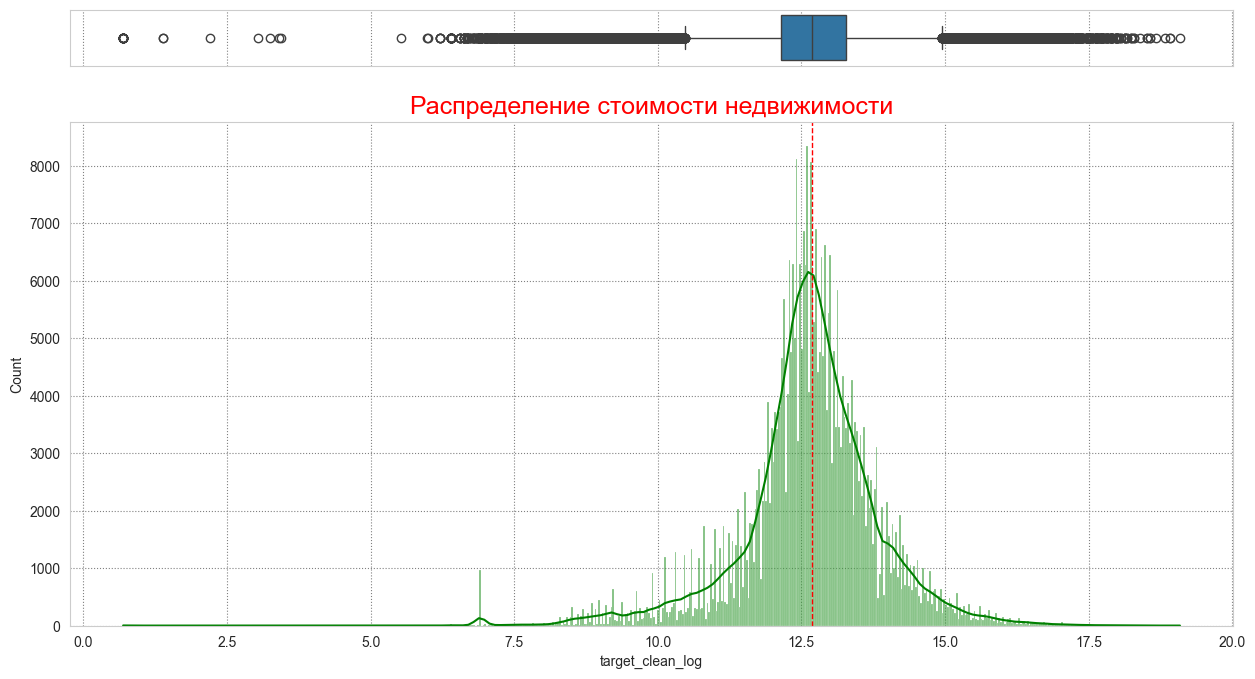

In [55]:
sns.set_style("whitegrid", {"grid.color": ".5", "grid.linestyle": ":"})
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':{.10, .90}}, figsize = (15, 8)) # задаем размер координатной плоскости и соотношение графиков
# коробчатая диаграмма 
sns.boxplot(data['target_clean_log'], orient="h", ax=ax_box)
# гистограмма
sns.histplot(data['target_clean_log'], kde=True, color='green', ax=ax_hist)
ax_hist.axvline(data['target_clean_log'].median(), color='red', linestyle='--', linewidth=1) # отобразим медианное значение
plt.title('Распределение стоимости недвижимости', fontsize=18, color='r')
plt.show()

In [56]:
# задаем уровень значимости для проведения статистического теста
alpha = 0.05
__, p_v = stats.normaltest(data['target_clean_log'])
print('p-value = {:.3f}'.format(p_v))
if p_v <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Согласно графику, логарифмическое распределение целевого признака - стоимость недвижимости можно отнести к нормальному распределению.
Но благодаря тесту мы можем сказать, что распределение нельзя отнести к нормальному.

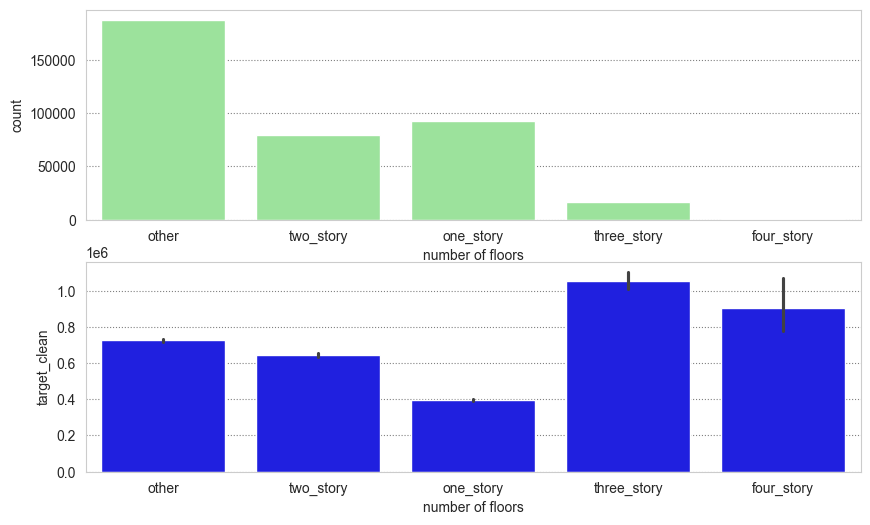

In [57]:
# Распределение цен на квартиры в зависимости от количества этажей
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.countplot(x=data['stories'], color='lightgreen', ax=ax[0])
ax[0].set_xlabel('number of floors')
sns.barplot(x=data['stories'], y=data['target_clean'], color='blue', ax=ax[1])
ax[1].set_xlabel('number of floors')
plt.show()

Естественно в топе продаж 1 - этажные дома, а самыми дорогими являются 3, 4 - этажные дома.

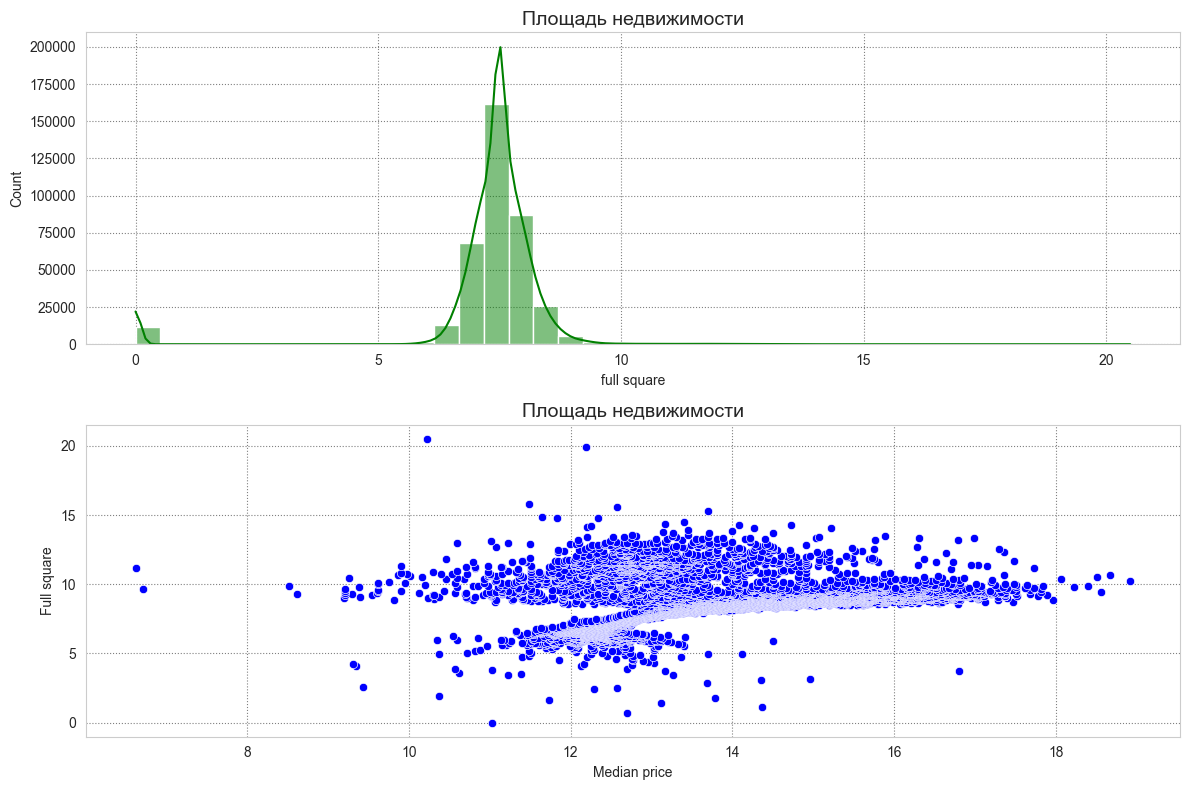

In [ ]:
# сгруппируем цены по площади
square = data.groupby('sqft_clean_log')['target_clean_log'].median()
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
# гистограмма распределения площади квартир
sns.histplot(x=data['sqft_clean_log'], kde=True, color='green', bins=40, ax = ax[0])
ax[0].set_title('Площадь недвижимости', fontsize=14)
ax[0].set_xlabel('full square')
# диаграмма рассеяния стоимости квартир в зависимости от площади
sns.scatterplot(x=square.values, y=square.index, color='blue', ax = ax[1])
ax[1].set_xlabel('Median price')
ax[1].set_ylabel('Full square')
ax[1].set_title('Площадь недвижимости', fontsize=14)
plt.tight_layout()
plt.show()

Мы не наблюдаем явной линейной зависимости между ценой недвижимости и площадью недвижимости.

###  <font >Этап 3. Кодирование, отбор и нормализация признаков</font>

### <font>3.1 Кодирование признаков</font>

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   status             377185 non-null  object 
 1   propertyType       377185 non-null  object 
 2   fireplace          377185 non-null  int64  
 3   state              377185 non-null  object 
 4   stories            377185 non-null  object 
 5   PrivatePool        377185 non-null  int64  
 6   baths_clean        377185 non-null  float64
 7   beds_clean         377185 non-null  float64
 8   sqft_clean         377185 non-null  float64
 9   target_clean       377185 non-null  float64
 10  Year built         377185 non-null  float64
 11  Remodeled year     377185 non-null  float64
 12  Heating            377185 non-null  int64  
 13  Cooling            377185 non-null  int64  
 14  Parking            377185 non-null  int64  
 15  lotsize            377185 non-null  float64
 16  Pr

In [59]:
data = pd.get_dummies(data, columns = ['status', 'propertyType', 'state', 'stories'])
data.head()

,fireplace,PrivatePool,baths_clean,beds_clean,sqft_clean,target_clean,Year built,Remodeled year,Heating,Cooling,...,propertyType_townhouse,state_east,state_north,state_south,state_west,stories_four_story,stories_one_story,stories_other,stories_three_story,stories_two_story
0,0,0,3.0,4.0,2900.0,418000.0,2019.0,2006.0,0,0,...,False,False,False,True,False,False,False,True,False,False
1,0,0,3.0,3.0,1947.0,310000.0,2019.0,2006.0,0,0,...,False,False,False,False,True,False,False,False,False,True
2,1,1,2.0,3.0,3000.0,2895000.0,1961.0,1967.0,1,1,...,False,False,False,False,True,False,True,False,False,False
3,1,0,8.0,5.0,6457.0,2395000.0,2006.0,2006.0,1,1,...,False,False,False,True,False,False,False,False,True,False
4,0,0,2.0,3.0,1800.0,5000.0,2019.0,2006.0,0,0,...,False,False,False,True,False,False,False,True,False,False


In [60]:
from sklearn import preprocessing

### <font>3.2 Анализ мультиколлинеарности</font>

Очень важным этапом перед началом моделирования является анализ линейных связей между признаками, определение значимости, приступаем к отбору наиболее информативных факторов.

Степень корреляции с target: 
target_clean                  0.474317
Price/sqft                    0.413852
propertyType_land             0.347472
school_1_rating               0.279235
school_2_rating               0.243107
school_3_rating               0.227566
state_west                    0.206909
PrivatePool                   0.167844
state_south                   0.149294
Cooling                       0.145824
fireplace                     0.134067
Parking                       0.132928
state_north                   0.129080
status_foreclosure            0.120018
stories_three_story           0.107848
propertyType_single_family    0.088123
stories_two_story             0.087459
state_east                    0.086025
propertyType_condo            0.085720
Heating                       0.081896
Name: target_clean_log, dtype: float64


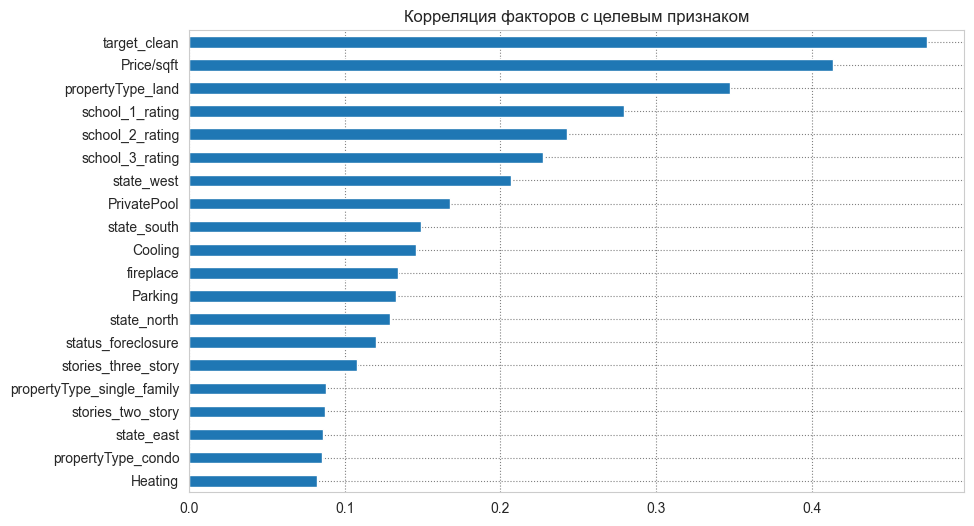

In [61]:
corr_target = data.corr()['target_clean_log']
# преобразуем значения корреляции в модуль значения
values = corr_target.sort_values().drop('target_clean_log').apply(lambda x: abs(x))
# выведем топ-20 и отобразим их на столбчатой диаграмме
values = values.sort_values(ascending=False).iloc[0: 20]
print('Степень корреляции с target: ', values, sep='\n')
values.sort_values(ascending=True).plot.barh(figsize=(10,6))
plt.title('Корреляция факторов с целевым признаком', fontsize = 12)
plt.show()

Лидерами по линейным связям с целевой переменной являются:

target_clean - цена недвижимости (0.47),
Price/sqft - цена за квадратный фут недвижимости (0.41),
propertyType_land - тип недвижимости (0.34),
school_1_rating  - рейтинг школ (0.29),
state_west - штат, в котором располагается недвижимость (0.20).
То есть наиболее важными факторами, влияющими на стоимость недвижимости, мы можем назвать:
цена за квадратный фут и тип недвижимости.

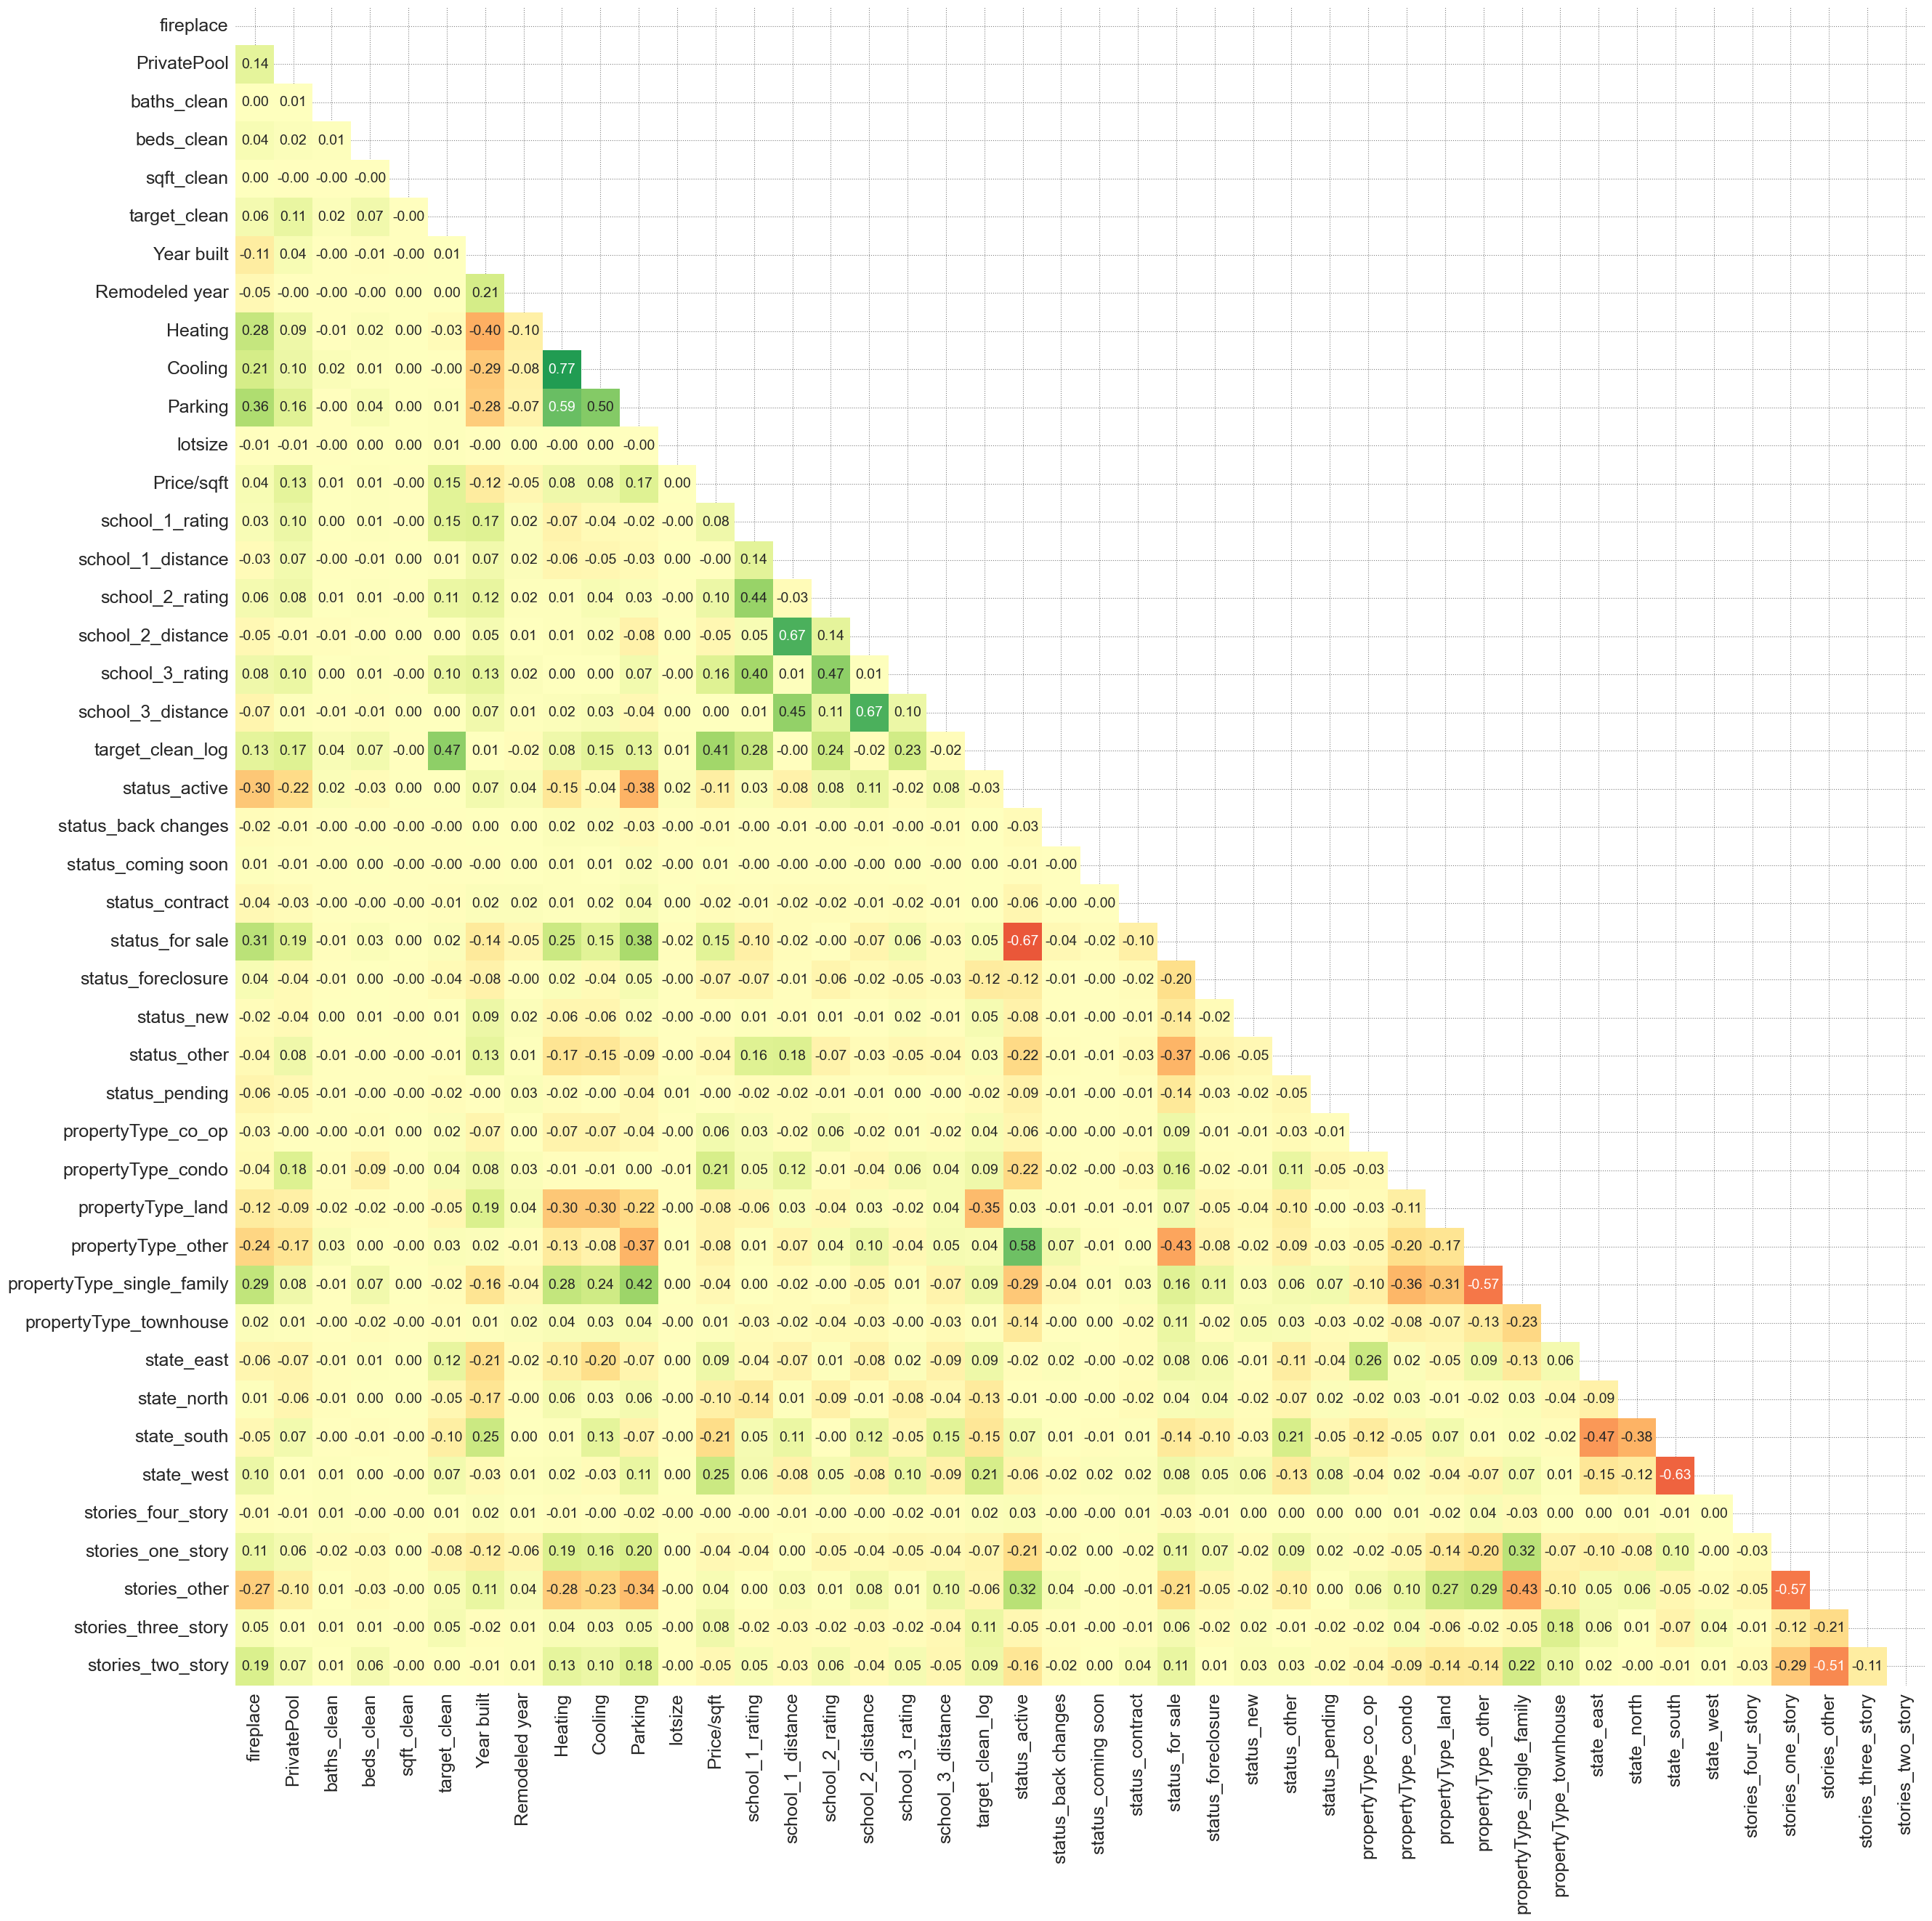

In [62]:
# построим корреляционную матрицу для оценки мультиколлинеарности
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(method='pearson'), cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={"size": 14}, 
            mask=np.triu(data.corr()), vmin=-1, vmax=1, center=0, cbar=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### <font>3.3 Разбиение набора данных на тренировочную и валидационную выборки</font>

Удалим из датасета признак Price/sqft из-за возможности утечки данных при обучении модели. 

In [63]:
data_clean = data.drop(['target_clean', 'Price/sqft'], axis=1)

Будем строить модели на признаке target_clean и на логорифмированом target_clean_log

In [64]:
data = data.drop(['target_clean_log', 'Price/sqft'], axis=1)

In [65]:
X = data.drop(['target_clean'], axis=1)
y = data['target_clean']

In [66]:
X_log = data_clean.drop(['target_clean_log'], axis=1)
y_log = data_clean['target_clean_log']

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [67]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=42
)

In [68]:
X_train_log, X_valid_log, y_train_log, y_valid_log = model_selection.train_test_split(
    X_log, y_log, 
    test_size=0.33, 
    random_state=42
)

### <font>3.4 Тест на значимость, отбор признаков</font>

С помощью алгоритма фильтрации признаков SelectKBest отберем 20 признаков, в качестве функции отбора используем коэффициент корреляции Пирсона, параметр f_regression.

In [69]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=20)
selector.fit(X_train, y_train)
selected_cols = selector.get_feature_names_out().tolist()
selected_cols

['fireplace',
 'PrivatePool',
 'beds_clean',
 'sqft_clean',
 'Heating',
 'school_1_rating',
 'school_2_rating',
 'school_3_rating',
 'status_foreclosure',
 'propertyType_condo',
 'propertyType_land',
 'propertyType_other',
 'propertyType_single_family',
 'state_east',
 'state_north',
 'state_south',
 'state_west',
 'stories_one_story',
 'stories_other',
 'stories_three_story']

In [70]:
# оставим в наших выборках только отобранные 20 факторов
X_train = X_train[selected_cols]
X_valid = X_valid[selected_cols]
print(X_train.shape, X_valid.shape)

(252713, 20) (124472, 20)


In [71]:
selector_log = feature_selection.SelectKBest(feature_selection.f_regression, k=20)
selector_log.fit(X_train_log, y_train_log)
selected_cols_log = selector_log.get_feature_names_out().tolist()
selected_cols_log

['fireplace',
 'PrivatePool',
 'beds_clean',
 'Heating',
 'Cooling',
 'Parking',
 'school_1_rating',
 'school_2_rating',
 'school_3_rating',
 'status_foreclosure',
 'propertyType_condo',
 'propertyType_land',
 'propertyType_single_family',
 'state_east',
 'state_north',
 'state_south',
 'state_west',
 'stories_one_story',
 'stories_three_story',
 'stories_two_story']

In [72]:
# оставим в наших выборках только отобранные 20 факторов
X_train_log = X_train_log[selected_cols_log]
X_valid_log = X_valid_log[selected_cols_log]
print(X_train_log.shape, X_valid_log.shape)

(252713, 20) (124472, 20)


### <font>3.5 Масштабирование</font>


Используем нормализатор MinMaxScaler из библиотеки sklearn.

In [73]:
scaler = preprocessing.MinMaxScaler()
# нормализуем тренировочную выборку
X_train = scaler.fit_transform(X_train)
# нормализуем валидационную выборку
X_valid = scaler.transform(X_valid)

In [74]:
scaler_log = preprocessing.MinMaxScaler()
# нормализуем тренировочную выборку
X_train_log = scaler_log.fit_transform(X_train_log)
# нормализуем валидационную выборку
X_valid_log = scaler_log.transform(X_valid_log)

### <font>4. Решение задачи регрессии: линейная регрессия и деревья решений</font>

### <font>4.1. Модель линейной регрессии.</font>

Для target_clean будем использовать метрики: MAE, MAPE. 
Для target_clean_log будем использовать метрику: RMSLE. 

Метрика, по которой мы будем измерять качество наших моделей, -  RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная стоимость недвижимости (target_clean)
* $\hat{y_i}$- предсказанная моделью стоимость

Логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать стоимость недвижимости в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 

In [75]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_valid_pred = lr_model.predict(X_valid)

print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Valid MAE: {:.2f}'.format(metrics.mean_absolute_error(y_valid, y_valid_pred)))
print('Train MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)))
print('Valid MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid, y_valid_pred)))

Train MAE: 553729.57
Valid MAE: 563538.23
Train MAPE: 22.82
Valid MAPE: 15.68


In [76]:
lr_model_log = linear_model.LinearRegression()
lr_model_log.fit(X_train_log, y_train_log)
y_train_pred_log = lr_model_log.predict(X_train_log)
y_valid_pred_log = lr_model_log.predict(X_valid_log)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_log))))


Train RMSLE: 1.00
Valid RMSLE: 1.00


### <font>4.2 Модель полиномиальной регрессии 2-ой степени.</font>

In [77]:
# создаем генератор полиномиальных признаков 2-й степени
poly =  preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
# преобразуем выборки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

In [78]:
# создаем модель регрессии на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_train_poly_pred = lr_poly.predict(X_train_poly)
y_valid_poly_pred = lr_poly.predict(X_valid_poly)
print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_poly_pred)))
print('Valid MAE: {:.2f}'.format(metrics.mean_absolute_error(y_valid, y_valid_poly_pred)))
print('Train MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_poly_pred)))
print('Valid MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid, y_valid_poly_pred)))

Train MAE: 508329.38
Valid MAE: 2882491.28
Train MAPE: 22.55
Valid MAPE: 85.87


Отметим, что модель на полиномиальных признаках переобучена, на это указывает большой разброс в оценках метриках.

In [79]:
# создаем генератор полиномиальных признаков 2-й степени
poly =  preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_log)
# преобразуем выборки
X_train_poly_log = poly.transform(X_train_log)
X_valid_poly_log = poly.transform(X_valid_log)

In [80]:
# создаем модель регрессии на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly_log, y_train_log)
y_train_poly_pred_log = lr_poly.predict(X_train_poly_log)
y_valid_poly_pred_log = lr_poly.predict(X_valid_poly_log)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_poly_pred_log))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_poly_pred_log))))

Train RMSLE: 0.90
Valid RMSLE: 0.91


## 5. Решение задачи регрессии: ансамблевые методы и построение прогноза


Простые алгоритмы решения задачи регрессии уступают ансамблевым. Продолжим улучшать качество нашей модели с помощью ансамблевых.

In [83]:
#делаем импорт и выведем версию библиотеки
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

print("Версия Hyperopt : {}".format(hyperopt.__version__))

Версия Hyperopt : 0.2.7


### <font>5.1 Модель случайного леса.</font>

In [84]:
rf_model = ensemble.RandomForestRegressor(n_estimators=200,           # количество деревьев
                                          max_depth=12,               # глубина дерева
                                          criterion='squared_error',  # критерий информативности
                                          min_samples_split = 20,     # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                          random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_valid_pred = rf_model.predict(X_valid)
print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Valid MAE: {:.2f}'.format(metrics.mean_absolute_error(y_valid, y_valid_pred)))
print('Train MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)))
print('Valid MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid, y_valid_pred)))

Train MAE: 325669.40
Valid MAE: 340364.85
Train MAPE: 18.35
Valid MAPE: 10.15


In [85]:
rf_model_log = ensemble.RandomForestRegressor(n_estimators=200,           # количество деревьев
                                          max_depth=12,               # глубина дерева
                                          criterion='squared_error',  # критерий информативности
                                          min_samples_split = 20,     # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                          random_state=42)
rf_model_log.fit(X_train_log, y_train_log)
y_train_pred_log = rf_model_log.predict(X_train_log)
y_valid_pred_log = rf_model_log.predict(X_valid_log)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_log))))

Train RMSLE: 0.83
Valid RMSLE: 0.83


In [86]:
# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 10, 25, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1)
      }
# зафиксируем random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestRegressor(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    score = metrics.mean_absolute_percentage_error(y, model.predict(X))
    
    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [87]:
%%time
# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=10, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state) # фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 10/10 [33:57<00:00, 203.79s/trial, best loss: -18.731447764536732]
Наилучшие значения гиперпараметров {'max_depth': np.float64(11.0), 'min_samples_leaf': np.float64(8.0), 'n_estimators': np.float64(172.0)}
CPU times: total: 25min 6s
Wall time: 33min 58s


In [88]:
rf_model = ensemble.RandomForestRegressor(n_estimators=172,           # количество деревьев
                                          max_depth=11,               # глубина дерева
                                          criterion='squared_error',  # критерий информативности
                                          min_samples_split = 8,     # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                          random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_valid_pred = rf_model.predict(X_valid)
print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Valid MAE: {:.2f}'.format(metrics.mean_absolute_error(y_valid, y_valid_pred)))
print('Train MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)))
print('Valid MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid, y_valid_pred)))

Train MAE: 325669.25
Valid MAE: 343924.89
Train MAPE: 19.20
Valid MAPE: 10.67


In [89]:
rf_model_log = ensemble.RandomForestRegressor(n_estimators=172,           # количество деревьев
                                          max_depth=11,               # глубина дерева
                                          criterion='squared_error',  # критерий информативности
                                          min_samples_split = 8,     # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                          random_state=42)
rf_model_log.fit(X_train_log, y_train_log)
y_train_pred_log = rf_model_log.predict(X_train_log)
y_valid_pred_log = rf_model_log.predict(X_valid_log)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_log))))

Train RMSLE: 0.84
Valid RMSLE: 0.85


### <font>5.2 Модель градиентного бустинга над деревьями решений</font>

In [74]:
grad_boost = ensemble.GradientBoostingRegressor(learning_rate=0.1,      # темп(шаг) обучения
                                                n_estimators=200,       # количество деревьев
                                                max_depth=9,            # глубина дерева
                                                min_samples_split=9,   # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                                random_state=42)
grad_boost.fit(X_train, y_train)
y_train_pred = grad_boost.predict(X_train)
y_valid_pred = grad_boost.predict(X_valid)
print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Valid MAE: {:.2f}'.format(metrics.mean_absolute_error(y_valid, y_valid_pred)))
print('Train MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)))
print('Valid MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid, y_valid_pred)))

Train MAE: 270222.56
Valid MAE: 321504.06
Train MAPE: 15.17
Valid MAPE: 7.60


In [90]:
grad_boost_log = ensemble.GradientBoostingRegressor(learning_rate=0.1,      # темп(шаг) обучения
                                                n_estimators=200,       # количество деревьев
                                                max_depth=9,            # глубина дерева
                                                min_samples_split=9,   # минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
                                                random_state=42)
grad_boost_log.fit(X_train_log, y_train_log)
y_train_pred_log = grad_boost_log.predict(X_train_log)
y_valid_pred_log = grad_boost_log.predict(X_valid_log)
print('Train RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log))))
print('Valid RMSLE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_log))))


Train RMSLE: 0.73
Valid RMSLE: 0.77


### <font>5.3 Модель экстремального градиентного бустинга.</font>

XGBoost - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [91]:
import xgboost as xgb                   # алгоритм экстремального градиентного бустинга

In [92]:
# Создание матриц наблюдений в формате DMatrix
dtrain_log = xgb.DMatrix(X_train_log, label=y_train_log, feature_names=selected_cols_log)
dvalid_log = xgb.DMatrix(X_valid_log, label=y_valid_log, feature_names=selected_cols_log)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:

In [93]:
# гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# тренировочная выборка
watchlist = [(dtrain_log, 'train')]
# Обучаем модель XGBoost
xgb_model = xgb.train(
    params=xgb_pars,                           # гиперпараметры модели
    dtrain=dtrain_log,                             # обучающая выборка
    num_boost_round=300,                       # количество моделей в ансамбле
    evals=watchlist,                           # выборки, на которых считается матрица
    early_stopping_rounds=20,                  # раняя остановка
    maximize=False,                            # смена поиска максимума на минимум
    verbose_eval=False                         # шаг, через который происходит отображение метрик
)

In [94]:
# делаем предсказание на валидационном наборе данных
y_valid_pred_xgb = np.exp(xgb_model.predict(dvalid_log)) - 1
print('Valud RMSLE %.3f' % xgb_model.best_score)

Valud RMSLE 0.801


### <font>6.4 Определение самых важных характеристик из набора данных для предсказания целевой переменной - стоимости недвижимости.</font>

XGBoost имеет возможность определения коэффициентов важности факторов и визуализации их в в виде столбчатой диаграммы - функция plot_importance():

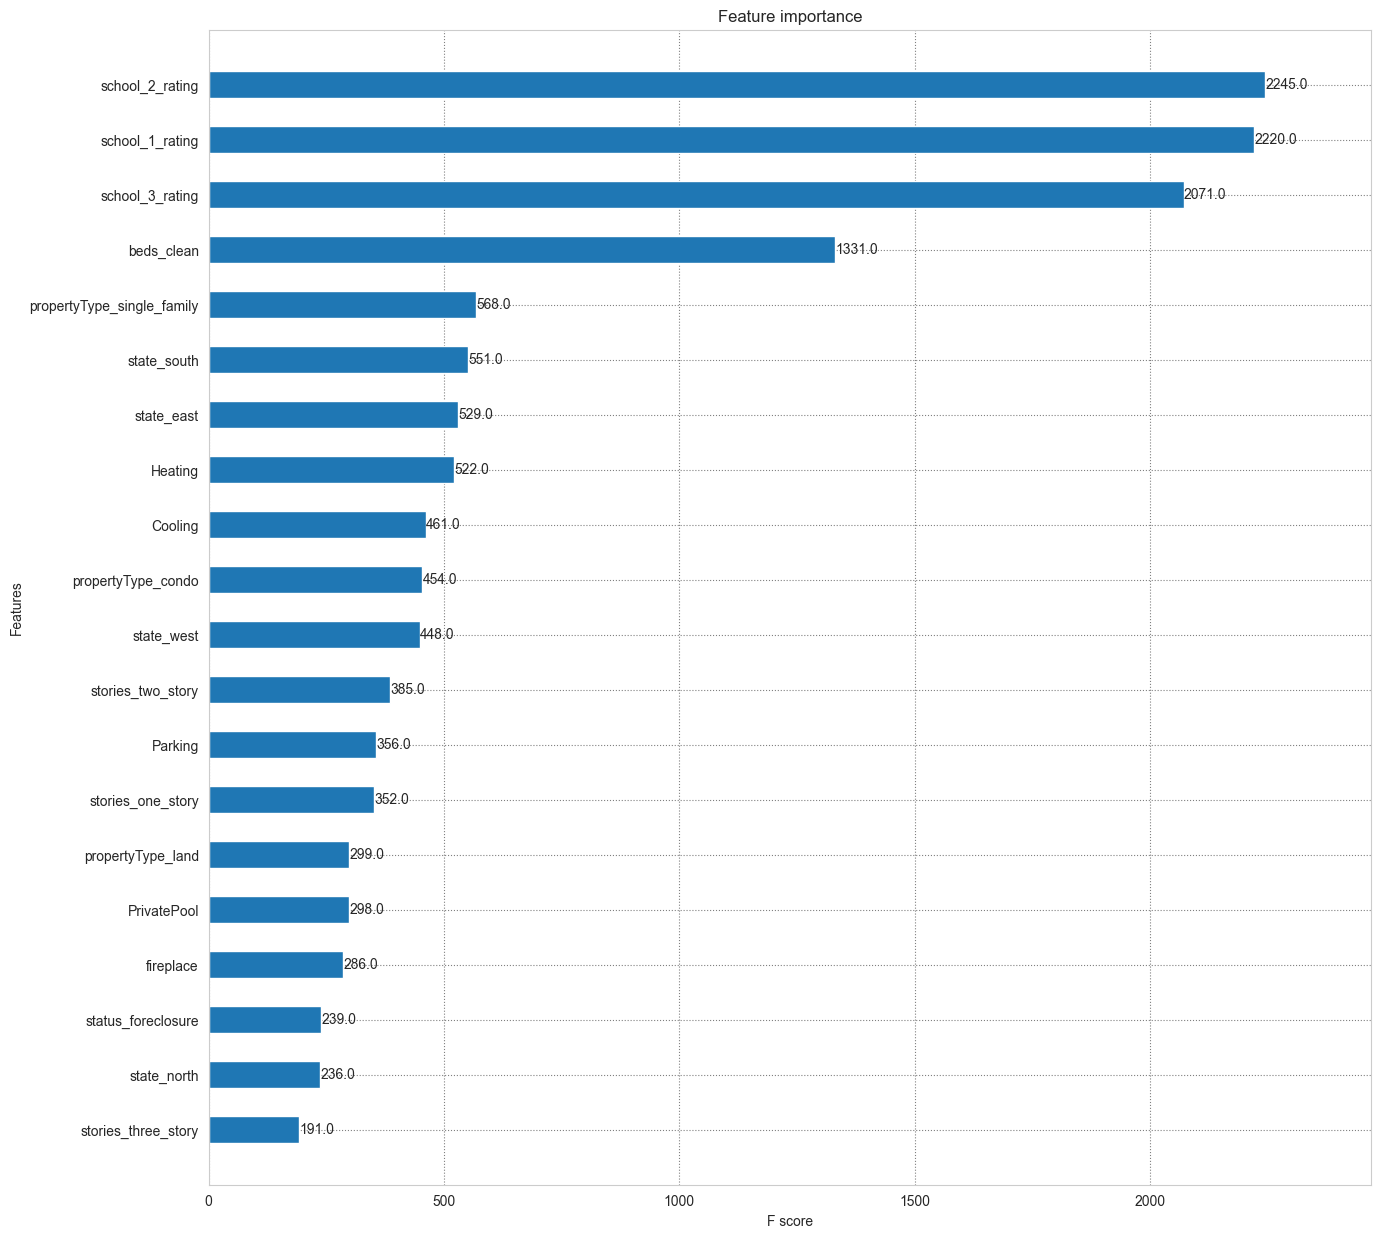

In [95]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(xgb_model, ax = ax, height=0.5);

***Топовые факторы, влиящих на стоимость недвижимости, согласно xgb_model являются:***
* ***school_rating*** — рейтинг школ;
* ***beds_clean*** —   количество спален;
* ***propertyType*** —   тип недвижимости;
* ***state*** — штат, где располагается недвижимость;
* ***heating*** — наличие отопления.

### <font>6.5 Расчет MeAE на модели экстремального градиентного бустинга.</font>

In [96]:
# переведем валидационный целевой признак в изначальное состояние
y_valid = np.exp(y_valid_log) - 1
print('Valid MeAE: {:.1f}'.format(metrics.median_absolute_error(y_valid, y_valid_pred_xgb)))
print('Valid MAE: {:.2f}'.format(metrics.mean_absolute_error(y_valid, y_valid_pred_xgb)))
print('Valid MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid, y_valid_pred_xgb)))

Valid MeAE: 113000.8
Valid MAE: 354777.08
Valid MAPE: 4.01


## <center>Заключение</center>
1) Мы провели тщательный анализ данных, что позволило выявить ключевые факторы, влияющие на стоимость недвижимости. Использование различных методов предобработки данных, таких как нормализация и кодирование категориальных переменных, обеспечило высокое качество входных данных для моделей
2) Мы протестировали несколько алгоритмов машинного обучения, включая линейную регрессию, деревья решений и ансамблевые методы, такие как Random Forest и Gradient Boosting. Наилучшие результаты были достигнуты с использованием градиентного бустинга, который продемонстрировал высокую точность предсказаний и устойчивость к переобучению.
3) Мы провели кросс-валидацию и оптимизацию гиперпараметров, что позволило улучшить производительность модели и снизить ошибку предсказаний. Метрики, такие как RMSLE, подтвердили, что наша модель способна точно предсказывать стоимость недвижимости на основе предоставленных характеристик 

In [97]:
import joblib

In [101]:
# === Сохраняем модель ===
joblib.dump(xgb_model, "xgb_model.pkl")

['xgb_model.pkl']